# Portfolio modeling
### Kirill Zakharov
#### 14.03.2021

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import yfinance as yf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.style.use('ggplot')

In [28]:
names = ['SBER.ME','GAZP.ME', 'MTSS.ME', 'MGNT.ME', 'SNGS.ME', 'HYDR.ME', 'AFLT.ME', 'DSKY.ME']
data = pd.DataFrame(columns=names)

for name in names:
    
    data[name] = yf.download(name, '2018-01-01', '2021-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
data.head(5)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME
Date,,,,,,,,
2018-01-03,154.489380,116.169998,197.995163,5095.507324,26.139996,0.638334,127.199066,70.177948
2018-01-04,159.086075,119.412567,202.738434,5208.654297,26.392916,0.650833,134.899857,71.621933
2018-01-05,158.952835,120.493423,202.199417,5283.299316,26.435070,0.654023,133.450317,71.621933
2018-01-09,160.151993,123.024216,203.421158,5185.867676,26.528746,0.654885,136.349426,71.116539
2018-01-10,158.393234,126.038307,204.427307,5233.011719,26.673941,0.667988,135.262268,71.658035


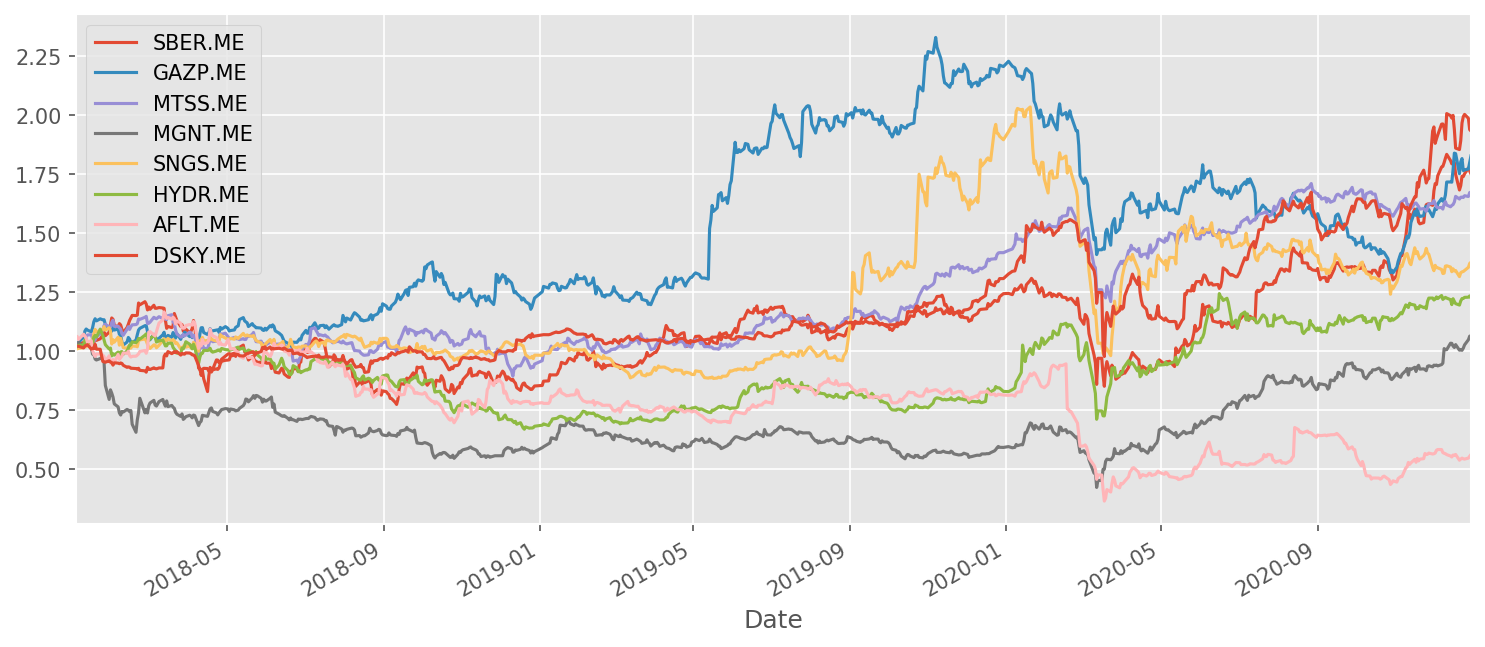

In [42]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
(data.pct_change()+1).cumprod().plot(ax=ax)
plt.show()

In [59]:
return_pct = data.pct_change()
return_pct.head(4)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME
Date,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,0.029754,0.027912,0.023956,0.022205,0.009676,0.019581,0.060541,0.020576
2018-01-05,-0.000838,0.009051,-0.002659,0.014331,0.001597,0.004901,-0.010745,0.000000
2018-01-09,0.007544,0.021004,0.006042,-0.018441,0.003544,0.001318,0.021724,-0.007056


In [88]:
mean_return = return_pct.mean(skipna=True)
mean_return*100

SBER.ME    0.095541
GAZP.ME    0.095341
MTSS.ME    0.077270
MGNT.ME    0.028000
SNGS.ME    0.062455
HYDR.ME    0.042576
AFLT.ME   -0.050231
DSKY.ME    0.101685
dtype: float64

In [67]:
cov_matrix = return_pct.cov()
cov_matrix

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME
SBER.ME,0.000415,0.000155,0.000122,0.000125,0.000112,0.000149,0.000186,0.000117
GAZP.ME,0.000155,0.000304,0.000093,0.000102,0.000142,0.000101,0.000117,0.000064
MTSS.ME,0.000122,0.000093,0.000172,0.000088,0.000092,0.000088,0.000083,0.000053
MGNT.ME,0.000125,0.000102,0.000088,0.000390,0.000091,0.000122,0.000103,0.000041
SNGS.ME,0.000112,0.000142,0.000092,0.000091,0.000403,0.000114,0.000116,0.000062
HYDR.ME,0.000149,0.000101,0.000088,0.000122,0.000114,0.000307,0.000138,0.000074
AFLT.ME,0.000186,0.000117,0.000083,0.000103,0.000116,0.000138,0.000533,0.000101
DSKY.ME,0.000117,0.000064,0.000053,0.000041,0.000062,0.000074,0.000101,0.000275


## Optimization

In [68]:
from scipy.optimize import linprog

In [80]:
c = mean_return
res = linprog(-c, A_eq=[np.ones(len(c))], b_eq=1, bounds=(0.05, 0.15))
w = res['x']
w

array([0.14999994, 0.14999994, 0.1499999 , 0.05000064, 0.14999982,
       0.14999975, 0.05000008, 0.14999994])

In [125]:
print(f'Return: {np.dot(c, w)*100}')

Return: 0.07011855312145708


In [127]:
print(f'Risk: {np.dot(np.dot(w, cov_matrix), w)*100}')

Risk: 0.013387055516798203
